Using TensorFlow backend.


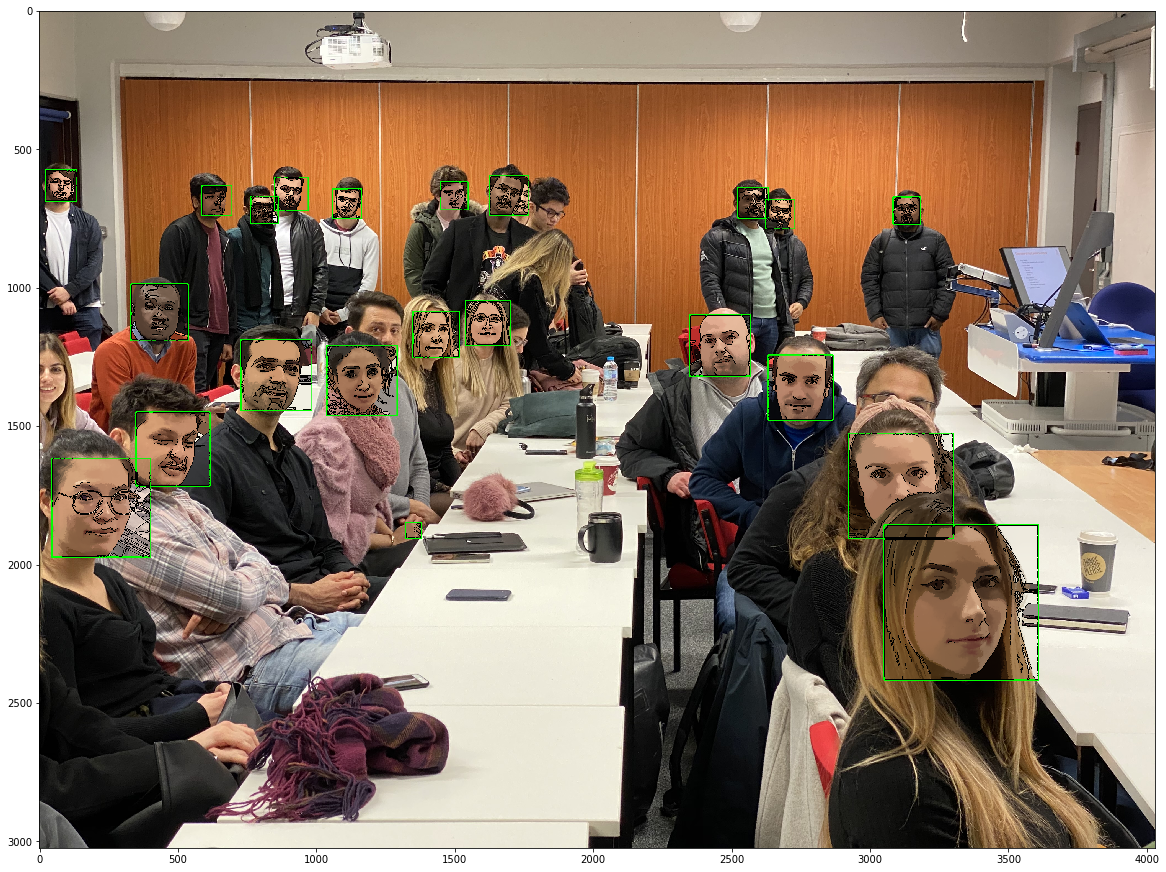

[['78', [857.0, 1317.0]],
 ['42', [1166.5, 1336.5]],
 ['21', [435.0, 1090.0]],
 ['13', [79.5, 633.5]],
 ['un', [1621.0, 1129.0]],
 ['un', [911.5, 663.5]],
 ['un', [1499.0, 670.0]],
 ['un', [1698.0, 668.0]],
 ['un', [642.0, 687.0]],
 ['09', [1112.5, 698.5]],
 ['un', [2580.0, 695.0]],
 ['un', [1434.5, 1170.5]],
 ['un', [814.0, 721.0]],
 ['un', [3134.5, 723.5]],
 ['40', [2460.0, 1210.0]],
 ['36', [2677.0, 736.0]],
 ['26', [1352.5, 1878.5]],
 ['un', [483.5, 1583.5]],
 ['42', [3114.0, 1717.0]],
 ['46', [224.5, 1795.5]],
 ['un', [2751.0, 1362.0]],
 ['27', [3331.5, 2137.5]]]

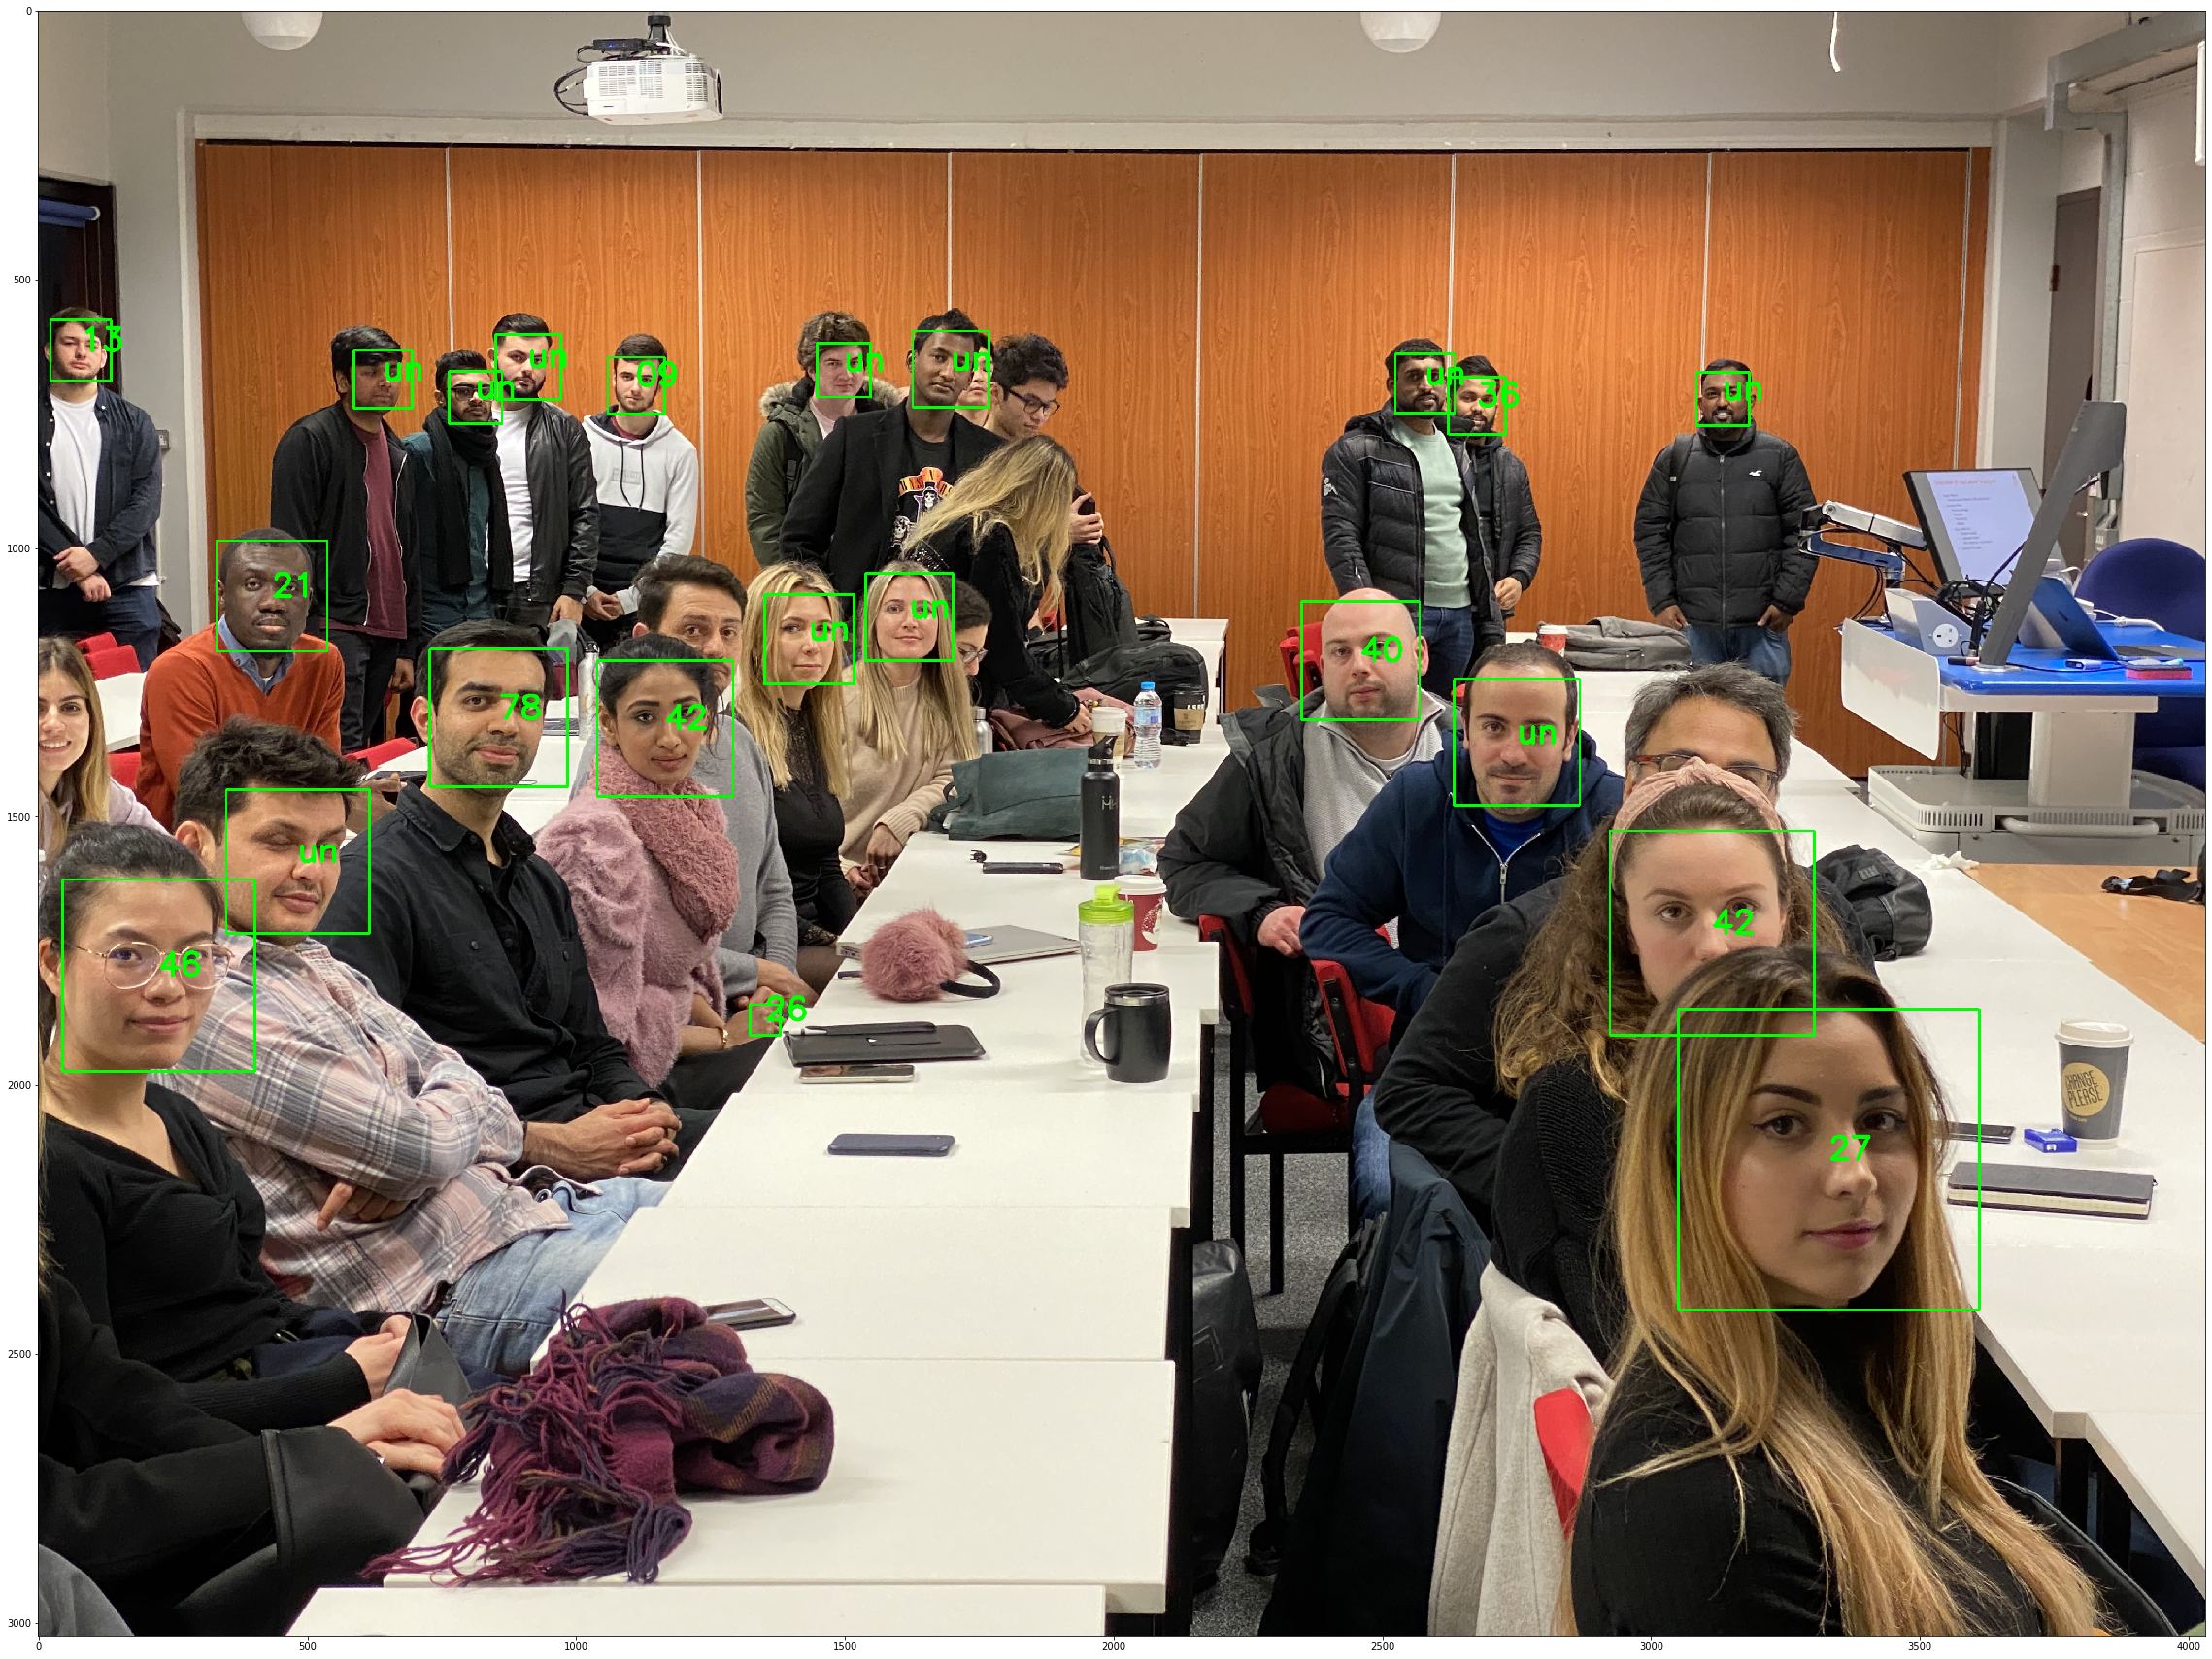

In [1]:
import os, sys
os.chdir(r'C:\Users\Prerna Prakash Gupta\Desktop\savedmodel\models')
import numpy as np
import cv2
import pandas as pd
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)

import mahotas
import h5py
import joblib
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from cv2 import CascadeClassifier
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from numpy import loadtxt
from keras.models import load_model
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def image_classification(img, feature, model, creativemode):
    # labels of 48 student ID's
    labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 78]
    # empty list created
    range1=[]
    # create dictionary to map student ID labels to 0-47 index values
    for j in range(48):
        range1.append(j)
    dictionary = dict(zip(range1, labels))
    #create matplotlib figure size
    plt.figure(figsize=(20,20))
    #read the image from the path
    image =cv2.imread(img)
    #read image again from path(we create two images-1 for creative mode & 1 for prediction-to avoid clutter)
    image1=cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #Extract HarrasCascase Haar Cascade classifier, based on the Haar Wavelet technique 
    #to analyse pixels in the image; cascade classifier is based on Viola Jones detection algorithm 
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=3, minSize=(30, 30))
    #save extracted faces in the list data 
    data=[]
    for (ex, ey, ew, eh) in faces:
            crop_image = image[ey:ey+eh, ex:ex+ew] 
            #from each face get coordinates of length in centres of given face from the image
            length=(ew+ex+ex)/2
             #from each face get coordinates of length in centres of given face from the image
            breadth=(eh+ey+ey)/2
            #save centre of face in list q1
            q1=[length, breadth]
            #save coordinates of midpoint of image and cropped image in list data 
            #append for each face in a loop
            data.append([q1, crop_image])
            #draw rectangle around faces in both images for creative mode & prediction
            cv2.rectangle(image, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 4)
            cv2.rectangle(image1, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 4)
            
            #if creative mode is true, we convert each face to a cartoon
            if creativemode==1:
                gray = cv2.cvtColor(crop_image, cv2.COLOR_BGRA2GRAY)
                edges = cv2.blur(gray, (3, 3)) # this blur gets rid of some noise
                edges = cv2.Canny(edges, 50, 150, apertureSize=3) # this is the edge detection

                # the edges are a bit thin, this blur and threshold make them a bit fatter
                kernel = np.ones((3,3), dtype=np.float) / 12.0
                edges = cv2.filter2D(edges, 0, kernel)
                edges = cv2.threshold(edges, 50, 255, 0)[1]

                # and back to colour
                edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

                # this blurs things but keeps track of colour boundaries 
                shifted = cv2.pyrMeanShiftFiltering(crop_image, 50, 20)
                q12=cv2.subtract(shifted, edges)
                #this area of the face in the image is superimposed by the cartooned image
                image[ey:ey+eh, ex:ex+ew] =q12
    #the window size is adjusted
    cv2.namedWindow("myImage", cv2.WINDOW_NORMAL)
    #window is opened displying the cartoon image
    cv2.imshow("myImage", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    pic=image
    #the image is plotted in the Jupyter Notebook
    pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    plt.imshow(pic)
    plt.show()
    
    #if featue is hog:
    if (feature == 'hog'):
        #create an empty list classification
        classification=[]
        #empty list to store hig features
        hog_features=[]
        
        #for loop is created for every face in the image
        for i in range(len(data)):
            #each face is resized to 128*64
            resized_img= resize(data[i][1], (128,64)) 
            #hog features are extracted for the face
            hogfeatures, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), visualize=True, multichannel=True)
            #in the for loop sucessive hog features of the face are stored
            hog_features.append(hogfeatures)
        #the X feature vector consisting of hog features of the faces is constructed    
        unscaled_x = np.vstack(hog_features).astype(np.float64)
        scaler = StandardScaler().fit(unscaled_x)
        x = scaler.transform(unscaled_x)
        
        #if chosen model is SVM: it is downloaded from joblib
        if model=='SVM':
            model = joblib.load('supportVMHOGmodel.sav')    
        #if chosen model is KNN: it is downloaded from joblib
        elif model=='KNN':
            model= joblib.load('KNNHOGmodel.sav')
        #if chosen model is Random Forest: it is downloaded from joblib
        elif model== 'RF':
            model=joblib.load('RFCHOGmodel.sav')
        else:
            ##if chosen model is Logistic Reg: it is downloaded from joblib
            model=joblib.load('LOGITHOGmodel.sav')
        #the face images are predicted depending on the chosen model
        #first the class is predicted (ID with max prob) for each face is returned
        result = model.predict(x)
        #second the probability of each of 48 classes is predicted for each face
        result1=model.predict_proba(x)
        #the probability of ID with max prob is stored
        max_class_prob=np.amax(result1, axis=1)
        #for each of the faces in the image (i in the for loop)
        for i in range(len(data)):
            #if ID with max prob is < 0.15, unknown  is returned 
            #if ID with max prob is > 0.15 max prob class ID is returned
            if max_class_prob[i]<0.15:
                result[i]='unkown'
            #in the classification list, prediction of every face and coordinates of the centre of face are appended
            classification.append([result[i], data[i][0]])
    
    #if feature =global features
    elif (feature == 'globalfeatures'):
        #create empty classification list
        classification=[]
        # feature-descriptor-1: Hu Moments
        def fd_hu_moments(image):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            feature = cv2.HuMoments(cv2.moments(image)).flatten()
            return feature
        # feature-descriptor-2: Haralick Texture
        def fd_haralick(image):
            # convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # compute the haralick texture feature vector
            haralick = mahotas.features.haralick(gray).mean(axis=0)
            # return the result
            return haralick
        # feature-descriptor-3: Color Histogram
        def fd_histogram(image, mask=None):
            # convert the image to HSV color-space
            image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            # compute the color histogram
            hist  = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
            # normalize the histogram
            cv2.normalize(hist, hist)
            # return the histogram
            return hist.flatten()
        #create empty list of global features
        globalfeature=[]
        #loop over each face and extract the global features
        for i in range(len(data)):
            #gloabal feature extraction
            fv_hu_moments = fd_hu_moments(data[i][1])
            fv_haralick   = fd_haralick(data[i][1])
            fv_histogram  = fd_histogram(data[i][1])
            # Concatenate global features
            global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
            #append global features of all the faces in a loop
            globalfeature.append(global_feature)
        
        #the X feature vector consisting of global features of the faces is constructed
        unscaled_x = np.vstack(globalfeature).astype(np.float64)
        scaler = StandardScaler().fit(unscaled_x)
        x = scaler.transform(unscaled_x)
       #if chosen model is SVM: it is downloaded from joblib 
        if model=='SVM':
            model = joblib.load('SupportvectormachinemodelGL.sav')
        #if chosen model is KNN: it is downloaded from joblib 
        elif model=='KNN':
            model= joblib.load('KNNGF1model.sav')
        #if chosen model is Random Forest: it is downloaded from joblib 
        elif model== 'RF':
            model=joblib.load('RFCGLmodel1.sav')
        #if chosen model is Logsitiv Regression: it is downloaded from joblib 
        else:
            model=joblib.load('LOGGLmodel.sav')
         #the face images are predicted depending on the chosen model
        #first the class is predicted (ID with max prob) for each face is returned
        result1 = model.predict(x) 
        #second the probability of each of 48 classes is predicted for each face
        result12=model.predict_proba(x)
        #the probability of ID with max prob is stored
        max_class_prob1=np.amax(result12, axis=1)
        #if ID with max prob is < 0.15, unknown  is returned 
            #if ID with max prob is > 0.15 max prob class ID is returned
        for i in range(len(data)):
            if max_class_prob1[i]<0.15:
                result1[i]='unkown'
                 #in the classification list, prediction of every face and coordinates of the centre of face are appended
            classification.append([result1[i], data[i][0]])


#if features=none: CNN model is chosen
    else:
        #empty classification list is const
        classification=[]
        ROWS = 64
        COLS = 64
        CHANNELS = 3
        CLASSES = 48
        m = len(data)
        #empty array of size no. faces*64*64*3 is created
        X = np.zeros((m, ROWS, COLS, CHANNELS), dtype=np.uint8)
        for i in range(len(data)):
            #each face is resized to 64*64*3
            q=cv2.resize(data[i][1], (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
            X[i,:] = q
        #the resixed rescaled image faces are stored as datacnn
        datacnn=X
        #each face is normalised
        datacnn=datacnn/255
        #the trained CNN is loaded from h5
        model = load_model('modelCNN1.h5')
        ##the face images are predicted depending on the chosen model
         #the probability of each of 48 classes is predicted for each face
        result1cnn = model.predict(datacnn) 
        #ID is predicted (ID with max prob) for each face is returned
        result12cnn=model.predict_classes(datacnn)
        result12cnn=list(result12cnn)
        ##the probability of ID with max prob is stored
        max_class_probcnn=np.amax(result1cnn, axis=1)
        #if ID with max prob is < 0.15, unknown  is returned 
            #if ID with max prob is > 0.15 max prob class ID is returned
        labels_to_values=[]
        #the predicted indeces are mapped to predicted values and saved
        for ii in result12cnn:
            labels_to_values.append(dictionary[ii])
        for i in range(len(data)):
            if max_class_probcnn[i]<0.15:
                labels_to_values[i]='unknown'
            else:
                labels_to_values[i]=labels_to_values[i]
        #in the classification list, prediction of every face and coordinates of the centre of face are appended
            classification.append([labels_to_values[i], data[i][0]])
       
    #in the classification list from chosen model, on the image the predicted ID is displayed for each face    
    for i in range(len(classification)):
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image1, str(classification[i][0]), (int(classification[i][1][0]),int(classification[i][1][1])), font, 2, (0, 255, 0), 6, cv2.LINE_AA)
    #image window resized
    cv2.namedWindow("myImage", cv2.WINDOW_NORMAL)
    #image returned with rectangle around each face and predicted ID on the centre of face
    cv2.imshow("myImage", image1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    #image is plotted on Jupyter Notebook
    plt.figure(figsize=(40,40))
    pic = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    plt.imshow(pic)
    #clasification vetor (showing ID & centre of predicted image coordinates is returned)
    return(classification)





#image_classification(img, feature, model, creativemode)       
s=r'C:\Users\Prerna Prakash Gupta\Desktop\jpeg\jpeg\q.jpg'
image_classification(s, 'hog', 'SVM', 1)